# CSC 4850 / 6850 / DSCI 4850 - Assisgment 2 - (350/400 points)

**Total points (350 undergraduate / 400 graduate)**

**Student Name: Tony Imbesi**

***Undergraduate*** (select one)**

## Instructions:

You are to make a copy of this notebook on your own Google Drive (if you don't have one, get one, it is free), and use the exact format provided. Any code needs to go in the code cells, and any 'text' answer/description needs to go in the proper text cell. We will not be looking for answers randomly placed so please read the instructions.

You are to use only the libraries provided in the next code cell. Any additional library is NOT allowed and will cause you to lose all the points that use said library's functions/functionality. You can use any functions given in the class code examples, but be very very careful of lifting anything 
'as-is' from the internet as it will be considerered plagiarism. 

**IMPORTANT: Make sure you use 1234 for your randomseed/random state. Failure to do so will make your answers not comparable to the answer key and you will get a zero on the whole assignment.**

## Submission format:

The submission for Assignment two will have two components:

1) You are to create a PDF from the PRINT out of this notebook with all cells executed sequentially. It is the student's responsibility to be able to do this and no excuses will be accepted, no legible PDF = zero grade. So practice and test before submission time. This PDF should be named LastName_FirstName-Assignment2.PDF

2) The student should create a GitHub repository for this assignment and properly title the repository Class_CODE-ClassName-AssignmentTwo. This repository should have a readme file and the Google Colab notebook in it. Note that colab can save a copy directly to GitHub so make sure you test this. Downloading the notebook file and uploading it directly will result in 200 points deduction. The link to your GitHub repository should be included as text/message in the iCollege submission drop, failure to include this link will result in a 100 point penalty. 

## Extra Credit for all:

Any student can get 50 extra credit points by doing two simple things (you need to do BOTH):

1) Make nice and pretty plots (only using the provided packages!)

2) Make your GitHub repo professional (this includes your own landing page as well). Examples: https://github.com/abhisheknaiidu/awesome-github-profile-readme


Remember that you will need a portfolio for your job search, and a professional looking repo will certainly impress recruiters/interviewers. So this is more of a favor to yourself! (yes, I follow this myself: https://github.com/jmbanda)


In [1]:
############## These are the only imports allowed to solve this homework, so make sure you do not add anything else down below

%matplotlib inline

import numpy as np
import pandas as pd
import sklearn 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()


Using the Wine dataset from sklearn:

In [2]:
#get the wine dataset from sklearn and take a look at the description provided
from sklearn import datasets
wine = datasets.load_wine()

# Question 1 (10 points)

What can you say about the dataset (use code to descirbe it)? any particular things of interest? Find at least two things that you find interesting.

In [3]:
##### Code block for Question 1
df = pd.DataFrame(wine.data, columns=wine.feature_names)
print(df.info())

def find_norm(df, normfeature):
  norm_mean = df[normfeature].mean()
  norm_sd = df[normfeature].std()
  # plt.hist(df[normfeature])
  sd_range1 = df[normfeature].loc[(df[normfeature] >= norm_mean - norm_sd) & (df[normfeature] <= norm_mean + norm_sd)].count() * 100 / 178
  sd_range2 = df[normfeature].loc[(df[normfeature] >= norm_mean - norm_sd*2) & (df[normfeature] <= norm_mean + norm_sd*3)].count() * 100 / 178
  sd_range3 = df[normfeature].loc[(df[normfeature] >= norm_mean - norm_sd*3) & (df[normfeature] <= norm_mean + norm_sd*3)].count() * 100 / 178
  # print(f"{normfeature}:")
  # print(f"within 1 sd: {sd_range1} ({100 * sd_range1 / 178}%)")
  # print(f"within 2 sd: {sd_range2} ({100 * sd_range2 / 178}%)")
  # print(f"within 3 sd: {sd_range3} ({100 * sd_range3 / 178}%)")
  return [sd_range1, sd_range2, sd_range3]
  
# For each feature, record the percentage of samples whose feature values fall within each sd range
normdata = pd.DataFrame()
for (feature, item) in df.iteritems():
  normdata.insert(len(normdata.columns), feature, find_norm(df, feature))
normdata.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,64.044944,71.910112,73.033708,69.662921,74.157303,60.674157,59.550562,67.977528,71.910112,67.977528,64.044944,58.426966,66.853933
1,99.438202,99.438202,96.067416,96.629213,98.314607,99.438202,99.438202,100.000000,97.752809,99.438202,98.876404,100.000000,100.000000
2,100.000000,99.438202,98.314607,99.438202,98.876404,100.000000,99.438202,100.000000,99.438202,99.438202,99.438202,100.000000,100.000000


min flavanoids of class 1: 2.19
max flavanoids of class 3: 1.57


[Text(0.5, 1.0, 'Flavanoids')]

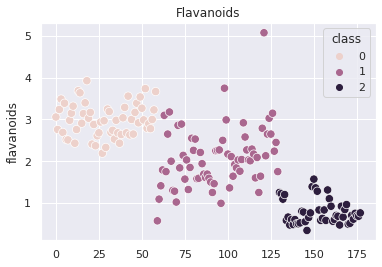

In [4]:
df['class'] = wine.target
# plt.scatter(df.index, df['flavanoids'], c=df['class'], cmap='rainbow')
# plt.show()

flav1 = df.loc[df['class'] == 0, ['flavanoids']]
flav3 = df.loc[df['class'] == 2, ['flavanoids']]
print(f"min flavanoids of class 1: {min(flav1['flavanoids'])}")
print(f"max flavanoids of class 3: {max(flav3['flavanoids'])}")

sns.scatterplot(data=df, x=df.index, y='flavanoids', hue="class", s=70).set(title = "Flavanoids")

1) It appears that class 0 samples will always have a higher flavanoids than class 2 samples.

2) The feature that most closely follows a normal distribution across all classes is "alcalinity_of_ash".

3) There are no null values for any feature in the entire dataset.

4) The "nonflavanoid_phenols" feature for class 1 appears to follow a normal distribution.

# Question 2 (10 points)

Remove class_2, so it becomes a binary problem now. Split the dataset into a testing and a training set using 65% of the data for training and the rest for testing. Use the built-in sklearn functionality for this, any other way will not be graded.

In [5]:
##### Code block for Question 2

from sklearn.model_selection import train_test_split
df1 = df.loc[df['class'] != 2]
train, test = train_test_split(df1, train_size=0.65, random_state=1234)
train_Y = train['class']
train_X = train.drop('class', axis=1)
test_Y = test['class']
test_X = test.drop('class', axis=1)
test.head(100)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
87,11.65,1.67,2.62,26.0,88.0,1.92,1.61,0.40,1.34,2.60,1.36,3.21,562.0,1
64,12.17,1.45,2.53,19.0,104.0,1.89,1.75,0.45,1.03,2.95,1.45,2.23,355.0,1
78,12.33,0.99,1.95,14.8,136.0,1.90,1.85,0.35,2.76,3.40,1.06,2.31,750.0,1
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,0
51,13.83,1.65,2.60,17.2,94.0,2.45,2.99,0.22,2.29,5.60,1.24,3.37,1265.0,0
27,13.30,1.72,2.14,17.0,94.0,2.40,2.19,0.27,1.35,3.95,1.02,2.77,1285.0,0
112,11.76,2.68,2.92,20.0,103.0,1.75,2.03,0.60,1.05,3.80,1.23,2.50,607.0,1
74,11.96,1.09,2.30,21.0,101.0,3.38,2.14,0.13,1.65,3.21,0.99,3.13,886.0,1
55,13.56,1.73,2.46,20.5,116.0,2.96,2.78,0.20,2.45,6.25,0.98,3.03,1120.0,0
32,13.68,1.83,2.36,17.2,104.0,2.42,2.69,0.42,1.97,3.84,1.23,2.87,990.0,0


# Question 3 (30 points)

Use the perceptron algorithm (with default settings and the correct seed) to build a model on the training set and report the model's accuracy.

In [6]:
##### Code block for Question 3
from sklearn.linear_model import Perceptron

m_perceptron = Perceptron(random_state=1234)

m_perceptron.fit(train_X, train_Y)

m_perceptron.score(test_X, test_Y)

0.6739130434782609

# Question 4 (20 points)

Show the classification report for the built model. In the text cell, following the code block for question 4, descibe what findings can be infered from the classification report. Mention at least 3 observations.

In [7]:
##### Code block for Question 4
from sklearn import metrics
pred_Y = m_perceptron.predict(test_X)
print(metrics.classification_report(test_Y, pred_Y))

              precision    recall  f1-score   support

           0       1.00      0.21      0.35        19
           1       0.64      1.00      0.78        27

    accuracy                           0.67        46
   macro avg       0.82      0.61      0.57        46
weighted avg       0.79      0.67      0.60        46



1) The class 0 precision of 1.0 comes from the fact that the model did not identify any class 1 sample as class 0. 

2) The class 0 recall suffered because the model identified 15 out of 19 class 0 samples as class 1, suggesting the model is very likely to identify any given sample as class 1.

3) Because the class 0 recall is significantly under 0.5 and there are only two classes to predict, you could increase the recall to 0.79 by taking its inverse, i.e. 1 - recall(class0).

# Question 5 (30 points)

Use the trained model to make predictions on the test set. Output AND plot the confusion matrix from the model's predictions. 

In the second code cell, plot side by side: On the left side, the test set and its labels (using features Alcohol as the X axis and Alcalinity of Ash as the Y axis) with each point colored depending its class label. On the right side, the actual predictions (use the same Alcohol as the X axis and Alcalinity of Ash as the Y axis) with each point colored depending on its class label.

[[ 4 15]
 [ 0 27]]


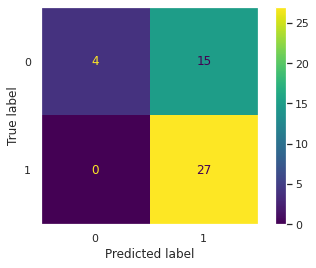

In [8]:
##### Code block for Question 5 - part 1
cnf_matrix = metrics.confusion_matrix(test_Y, pred_Y)
print(cnf_matrix)

ax = plt.subplot(1, 1, 1)
ax.grid(False)
cnf_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cnf_matrix, display_labels = m_perceptron.classes_)
cnf_display.plot(ax=ax)
plt.show()

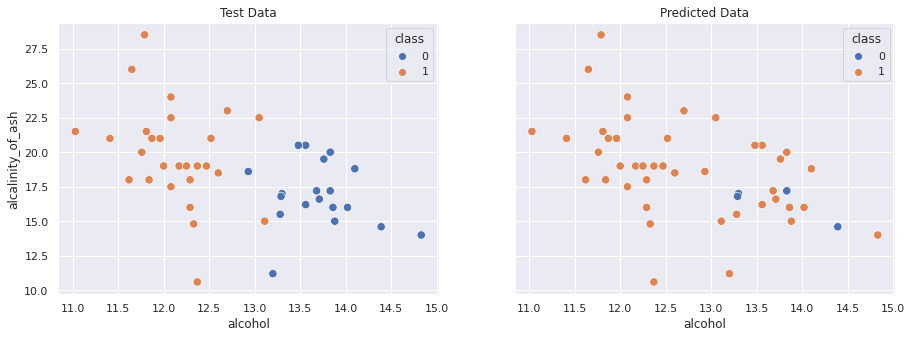

In [9]:
##### Code block for Question 5 - part 2
def show_plots(test_X, test_Y, pred_Y, classes):
  f, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5), sharey=True)

  test_X['class'] = test_Y

  sns.scatterplot(data=test_X, x='alcohol', y='alcalinity_of_ash', hue="class", s=70, palette=sns.color_palette(n_colors=classes), ax=ax1).set(title = "Test Data")
  
  test_X['class'] = pred_Y

  ax2 = sns.scatterplot(data=test_X, x='alcohol', y='alcalinity_of_ash', hue="class", s=70, palette=sns.color_palette(n_colors=classes), ax=ax2).set(title = "Predicted Data")

show_plots(test_X, test_Y, pred_Y, 2)

# Question 6 (10 points) 

a) Do the plot right plot on Question 5 - part 2 match the confusion matrix of part 1?

b) Any interesting observations from the predictions and the model performance? (write at least 2)

a) Yes, it does. The right plot shows four blue dots, representing the 4 class 0 samples it predicted as class 0. It predicted the remaining 15 class 0 samples as class 1, shown by the orange dots. No class 1 samples were predicted to be class 0, and all 27 class 1 samples were correctly identified as such.

b) 1. The perceptron model was heavily skewed towards predictions of class 1. The fact that not all the sets of features are linearly separable may have harmed its performance.
2. It may also be possible that the distribution of the training set was responsible for the perceptron's skew towards class 1. There are much more class 1 samples than class 0 samples in the testing set, which suggests a similar imbalance was also in the training set.


# Question 7 (10 points)

Reload the Wine dataset and split the dataset into a testing and a training set using 65% of the data for training and the rest for testing. Use the built-in sklearn functionality for this, any other way will not be graded.

In [10]:
##### Code block for Question 7
df2 = pd.DataFrame(wine.data, columns=wine.feature_names)
df2['class'] = wine.target

train2, test2 = train_test_split(df2, train_size=0.65, random_state=1234)
train2_Y = train2['class']
train2_X = train2.drop('class', axis=1)
test2_Y = test2['class']
test2_X = test2.drop('class', axis=1)
test2.head(178)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
111,12.52,2.43,2.17,21.0,88.0,2.55,2.27,0.26,1.22,2.00,0.90,2.78,325.0,1
123,13.05,5.80,2.13,21.5,86.0,2.62,2.65,0.30,2.01,2.60,0.73,3.10,380.0,1
63,12.37,1.13,2.16,19.0,87.0,3.50,3.10,0.19,1.87,4.45,1.22,2.87,420.0,1
88,11.64,2.06,2.46,21.6,84.0,1.95,1.69,0.48,1.35,2.80,1.00,2.75,680.0,1
141,13.36,2.56,2.35,20.0,89.0,1.40,0.50,0.37,0.64,5.60,0.70,2.47,780.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,12.25,1.73,2.12,19.0,80.0,1.65,2.03,0.37,1.63,3.40,1.00,3.17,510.0,1
42,13.88,1.89,2.59,15.0,101.0,3.25,3.56,0.17,1.70,5.43,0.88,3.56,1095.0,0
65,12.37,1.21,2.56,18.1,98.0,2.42,2.65,0.37,2.08,4.60,1.19,2.30,678.0,1
95,12.47,1.52,2.20,19.0,162.0,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937.0,1


# Question 8 (30 points)

Use the Decision Tree algorithm (with default settings and the correct seed) to build a model on the training set and report the model's accuracy.

In [11]:
##### Code block for Question 8
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state = 1234)
tree.fit(train2_X, train2_Y)
tree.score(test2_X, test2_Y)

0.9365079365079365

# Question 9 (20 points)

Show the classification report for the built model. In the text cell, following the code block for question 9, descibe what findings can be infered from the classification report. Mention at least 3 observations.

In [12]:
##### Code block for Question 9
pred2_Y = tree.predict(test2_X)
print(metrics.classification_report(test2_Y, pred2_Y))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        19
           1       0.92      0.92      0.92        26
           2       0.90      1.00      0.95        18

    accuracy                           0.94        63
   macro avg       0.94      0.94      0.94        63
weighted avg       0.94      0.94      0.94        63



1) Class 1 is the most frequent sample in the test set, which suggests there were less class 1 samples in the training set to compensate. This lack of exposure to class 1 during training could explain the lower F1-score for class 1. F1 score = 2 * (Precision * Recall) / (Precision + Recall)

2) The precision and recall for each class is generally much higher in this report compared to the one for the perceptron model. Unlike the perceptron, the decision tree classifier does not depend heavily on linearly separable data, so this probably gave it an advantage.

3) The model has perfect precision for class 0 and recall for class 2, but it also had the least number of samples of each to attempt to predict during testing. With a larger sample size, these numbers would probably go down as the model mislabels some samples.

# Question 10 (30 points)

Use the trained model to make predictions on the test set. Output AND plot the confusion matrix from the model's predictions. 

In the second code cell, plot side by side: On the left side, the test set and its labels (using features Alcohol as the X axis and Alcalinity of Ash as the Y axis) with each point colored depending its class label. On the right side, the actual predictions (use the same Alcohol as the X axis and Alcalinity of Ash as the Y axis) with each point colored depending on its class label.

[[17  2  0]
 [ 0 24  2]
 [ 0  0 18]]


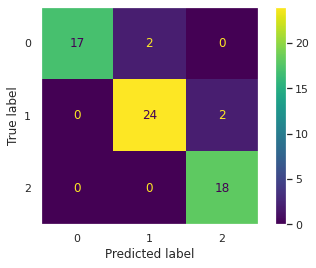

In [13]:
##### Code block for Question 10 - part 1

cnf_matrix = metrics.confusion_matrix(test2_Y, pred2_Y)
print(cnf_matrix)

ax = plt.subplot(1, 1, 1)
ax.grid(False)
cnf_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cnf_matrix, display_labels = tree.classes_)
cnf_display.plot(ax=ax)
plt.show()

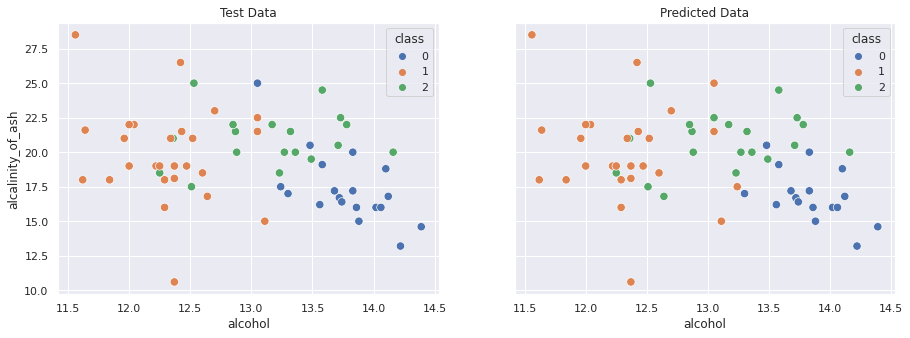

In [14]:
##### Code block for Question 10 - part 2

show_plots(test2_X, test2_Y, pred2_Y, 3)

# Question 11 (30 points) 

a) Do the plot right plot on Question 10 - part 2 match the confusion matrix of part 1?

b) Any interesting observations from the predictions and the model performance? (write at least 2)

c) Plot the figure from question 10 - part 2 using the `visualize_classifier` function given during the class example from 2/20/2023.

a) Yes, it does. Near (13, 25) and (13.25, 17.5), two class 0 samples were predicted to be class 1. And near (12.6, 17,5) and (13, 22.5), two class 1 samples were predicted to be class 2. These incorrect predictions were reflected in the confusion matrix.

b) 1. The two class 0 samples that got identified as class 1 had the lowest alcohol in their class. This might be why they got mislabeled, as the decision tree probably associated alcohol being less than 13.25 with the sample not being class 0.

2. The two class 1 samples that were predicted to be class 2 were both in an area where the features of classes 1 and 2 overlapped. This probably caused the model to compare other features to decide what to label them.

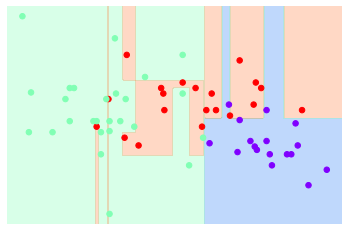

In [15]:
##### Code block for Question 11 - part c
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, zorder=1)

    ax.set(xlim=xlim, ylim=ylim)


x1 = test2_X['alcohol'].to_numpy()
x2 = test2_X['alcalinity_of_ash'].to_numpy()
X = np.stack((x1, x2), axis = 1)
visualize_classifier(tree, X, pred2_Y)

# Question 12 (10 points)

Reload the Wine dataset and split the dataset into a testing and a training set using 65% of the data for training and the rest for testing. Use the built-in sklearn functionality for this, any other way will not be graded.

In [16]:
##### Code block for Question 12

df3 = pd.DataFrame(wine.data, columns=wine.feature_names)
df3['class'] = wine.target

train3, test3 = train_test_split(df3, train_size=0.65, random_state=1234)
train3_Y = train3['class']
train3_X = train3.drop('class', axis=1)
test3_Y = test3['class']
test3_X = test3.drop('class', axis=1)
test3.head(178)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
111,12.52,2.43,2.17,21.0,88.0,2.55,2.27,0.26,1.22,2.00,0.90,2.78,325.0,1
123,13.05,5.80,2.13,21.5,86.0,2.62,2.65,0.30,2.01,2.60,0.73,3.10,380.0,1
63,12.37,1.13,2.16,19.0,87.0,3.50,3.10,0.19,1.87,4.45,1.22,2.87,420.0,1
88,11.64,2.06,2.46,21.6,84.0,1.95,1.69,0.48,1.35,2.80,1.00,2.75,680.0,1
141,13.36,2.56,2.35,20.0,89.0,1.40,0.50,0.37,0.64,5.60,0.70,2.47,780.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,12.25,1.73,2.12,19.0,80.0,1.65,2.03,0.37,1.63,3.40,1.00,3.17,510.0,1
42,13.88,1.89,2.59,15.0,101.0,3.25,3.56,0.17,1.70,5.43,0.88,3.56,1095.0,0
65,12.37,1.21,2.56,18.1,98.0,2.42,2.65,0.37,2.08,4.60,1.19,2.30,678.0,1
95,12.47,1.52,2.20,19.0,162.0,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937.0,1


# Question 13 (30 points)

Use the Logistic Regression (with as this is a multi-class problem, use the **One Vs Rest algorithm** we must use `liblinear` solver and the correct seed) to build a model on the training set and report the model's accuracy.

In [17]:
##### Code block for Question 13
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state = 1234, solver = "liblinear", multi_class = "ovr")
logreg.fit(train3_X, train3_Y)

logreg.score(test3_X, test3_Y)

0.9523809523809523

# Question 14 (20 points)

Show the classification report for the built model. In the text cell, following the code block for question 14, descibe what findings can be infered from the classification report. Mention at least 3 observations.

In [18]:
##### Code block for Question 14

pred3_Y = logreg.predict(test3_X)
print(metrics.classification_report(test3_Y, pred3_Y))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.96      0.92      0.94        26
           2       0.90      1.00      0.95        18

    accuracy                           0.95        63
   macro avg       0.95      0.96      0.95        63
weighted avg       0.95      0.95      0.95        63



1) The model appears to be slightly more reliable than the decision tree classifier given the same set of training and testing data. Since there are 13 features total, the decision tree classifier may have made too many decision nodes and suffered from overfitting.

2) While the logistic regression classifier also depends on the data being linearly separable, it performed much better than the perceptron did. 

3) 

# Question 15 (30 points)

Use the trained model to make predictions on the test set. Output AND plot the confusion matrix from the model's predictions. 

In the second code cell, plot side by side: On the left side, the test set and its labels (using features Alcohol as the X axis and Alcalinity of Ash as the Y axis) with each point colored depending its class label. On the right side, the actual predictions (use the same Alcohol as the X axis and Alcalinity of Ash as the Y axis) with each point colored depending on its class label.

[[18  1  0]
 [ 0 24  2]
 [ 0  0 18]]


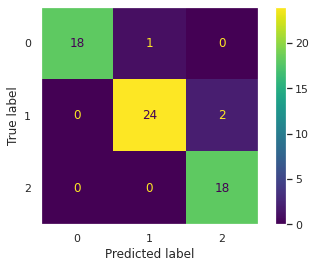

In [19]:
##### Code block for Question 15 - part 1

cnf_matrix = metrics.confusion_matrix(test3_Y, pred3_Y)
print(cnf_matrix)

ax = plt.subplot(1, 1, 1)
ax.grid(False)
cnf_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cnf_matrix, display_labels = logreg.classes_)
cnf_display.plot(ax=ax)
plt.show()

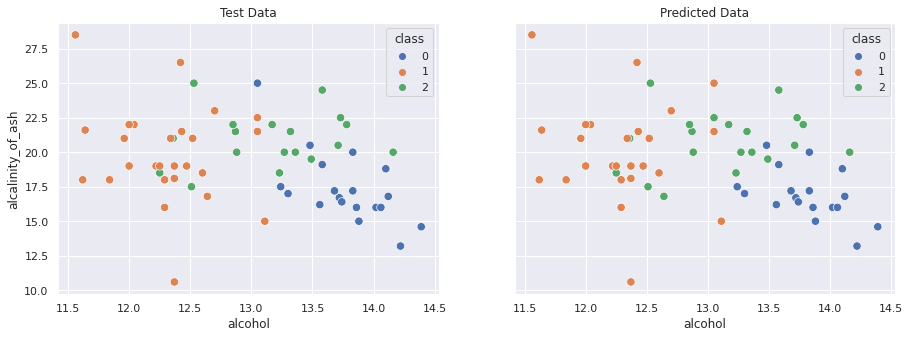

In [20]:
##### Code block for Question 15 - part 2

show_plots(test3_X, test3_Y, pred3_Y, 3)

# Question 16 (20 points) 

a) Do the plot right plot on Question 15 - part 2 match the confusion matrix of part 1?

b) Any interesting observations from the predictions and the model performance? (write at least 2)

a) Yes, it does. Around (13, 22.5) and (12.6, 17.5), two class 1 samples were predicted to be class 2. And around (13, 25), one class 0 sample was predicted to be class 1. This matches the values shown in the confusion matrix.

b) 1. Similarly to the decision tree classifier, the logistic regression classifier also incorrectly labeled the samples around (12.6, 17.5) and (13, 25). Perhaps some samples in the training set had very similar alcohol and alcalinity of ash but were in different classes.

2. With 178 samples in the dataset total, there are only about 115 samples in the training data. While logistic regression seems to be the best model so far, the sample size is still very small. Its reliability for this dataset could come into question after going through cross-validation.

# Question 17 (10 points)

Create AND display dataframe containing in each row the accruacy, precision, recall for each of the models built. 

In the textual answer cell, discuss which one is the best performing model and why?

In [21]:
##### Code block for Question 17

comp = pd.DataFrame()
comp['Model'] = ["Perceptron", "DecisionTree", "LogReg"]
acc1 = metrics.accuracy_score(test_Y, pred_Y)
acc2 = metrics.accuracy_score(test2_Y, pred2_Y)
acc3 = metrics.accuracy_score(test3_Y, pred3_Y)

avmode = "weighted"
prec1 = metrics.precision_score(test_Y, pred_Y, average=avmode)
prec2 = metrics.precision_score(test2_Y, pred2_Y, average=avmode)
prec3 = metrics.precision_score(test3_Y, pred3_Y, average=avmode)

rec1 = metrics.recall_score(test_Y, pred_Y, average=avmode)
rec2 = metrics.recall_score(test2_Y, pred2_Y, average=avmode)
rec3 = metrics.recall_score(test3_Y, pred3_Y, average=avmode)


comp["Accuracy"] = [acc1, acc2, acc3]
comp["Precision"] = [prec1, prec2, prec3]
comp["Recall"] = [rec1, rec2, rec3]

comp.head()

,Model,Accuracy,Precision,Recall
0,Perceptron,0.673913,0.790373,0.673913
1,DecisionTree,0.936508,0.939683,0.936508
2,LogReg,0.952381,0.954921,0.952381


Logistic regression is the best performing model. All of its metrics are generally higher than those of its two competitors.

# Graduate Student Question: (50 points)

Modify the `visualize_classifier` function provided during the 2/20/2023 class to be able to work in 3 dimensions (currently only works in two dimensions). Take the Decision Tree classifier model from Question 8 and plot the separation of the classes using the following axes: (Alcohol as the X axis and Alcalinity of Ash as the Y axis, and Ash as the Z axis).


TypeError: ignored

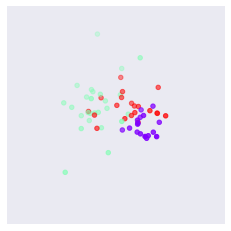

In [22]:
##### Code block for Graduate Student Question

def visualize_classifier_3d(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.figure().add_subplot(projection='3d')
    
    # Plot the training points
    plot = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    zlim = (0, 30)
    
    # fit the estimator
    model.fit(X, y)
    xx, yy, zz = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200),
                         np.linspace(*zlim, num=200))
    W = model.predict(np.c_[xx.ravel(), yy.ravel(), zz.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, zz, W, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, zorder=1)

    ax.set(xlim=xlim, ylim=ylim)
  

x1 = test2_X['alcohol'].to_numpy()
x2 = test2_X['alcalinity_of_ash'].to_numpy()
x3 = test2_X['ash'].to_numpy()
X = np.stack((x1, x2, x3), axis = 1)
visualize_classifier_3d(tree, X, pred2_Y)